In [1]:
#dependencies 
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
#import regression line for last section
from scipy.stats import linregress

#path to data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

#read the data in csv reader
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# mouse_metadata
#study_results
#combine/merge into a single dataset 
# put study_results first so mouse Id and timepoint are next to one another
mouse_data = pd.merge(study_results, mouse_metadata)

# display the table for preview
mouse_data.head(10) 

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  
5  Female           9          22  
6  Female           9          22  
7  Female           9          22  
8  Female           9          22  
9  Female           9          22

In [2]:
# checking the number of mice
merged_mice_count = mouse_data['Mouse ID'].nunique()
merged_mice_count

249

In [3]:
# getting the duplicate mice by ID number for Mouse ID
# and timepoint need to do a .loc function
# how to find duplicates in pandas https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.duplicated.html
#subset is ID and timepoints 
duplicate_df = mouse_data.loc[mouse_data.duplicated(subset=['Mouse ID', 'Timepoint']), "Mouse ID"].unique()  
duplicate_df


array(['g989'], dtype=object)

In [4]:
# create a clean df by dropping the duplicate mouse by its Mouse ID
# use .isin to take away the duplicated values in the main data frame that were identified in the duplicated_df
#.isin makes sure the values must match thus if you make it == False,it will remove the duplicates
# documentation: https://stackoverflow.com/questions/14057007/remove-rows-not-isinx/33642919
cleaned_mouse_data = mouse_data[mouse_data['Mouse ID'].isin(duplicate_df) == False]
cleaned_mouse_data.head(10)


Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0           45.000000                 0    Capomulin   
1     b128          5           45.651331                 0    Capomulin   
2     b128         10           43.270852                 0    Capomulin   
3     b128         15           43.784893                 0    Capomulin   
4     b128         20           42.731552                 0    Capomulin   
5     b128         25           43.262145                 1    Capomulin   
6     b128         30           40.605335                 1    Capomulin   
7     b128         35           37.967644                 1    Capomulin   
8     b128         40           38.379726                 2    Capomulin   
9     b128         45           38.982878                 2    Capomulin   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1  Female           9          22  
2  Female           9          22  
3  Female           9          22  
4  Female           9          22  
5  Female           9          22  
6  Female           9          22  
7  Female           9          22  
8  Female           9          22  
9  Female           9          22

In [5]:
#check number of mice in new dataframe

cleaned_count = len(cleaned_mouse_data['Mouse ID'].unique()) 
cleaned_count

248

Summary Statistics

In [6]:
#list of all regimens
drug_regimens = cleaned_mouse_data['Drug Regimen'].unique()  
drug_regimens

array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [7]:
#generate summary statistics of mean, median, variance, st. dev, and SEM for each regimen (medication)
# create multiple series and put all together at end

# statistics for Capomulin
capo_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']   
capo_mean = capo_stats.mean()['Tumor Volume (mm3)']
capo_med = capo_stats.median()['Tumor Volume (mm3)']
capo_var = capo_stats.var()['Tumor Volume (mm3)']
capo_st_d = capo_stats.std()['Tumor Volume (mm3)']
capo_sem = capo_stats.sem()['Tumor Volume (mm3)']

capo_analysis = pd.DataFrame({"Tumor Mean": capo_mean, "Tumor Median": capo_med, "Tumor Variance":
                             capo_var, "Tumor Standard Deviation": capo_st_d, "SEM": capo_sem}, index=[0])  
capo_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   40.675741     41.557809       24.947764                  4.994774   

        SEM  
0  0.329346

In [8]:
#Ketapril analysis

# statistics for Ketapril
keta_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ketapril']   
keta_mean = keta_stats.mean()['Tumor Volume (mm3)']
keta_med = keta_stats.median()['Tumor Volume (mm3)']
keta_var = keta_stats.var()['Tumor Volume (mm3)']
keta_st_d = keta_stats.std()['Tumor Volume (mm3)']
keta_sem = keta_stats.sem()['Tumor Volume (mm3)']

keta_analysis = pd.DataFrame({"Tumor Mean": keta_mean, "Tumor Median": keta_med, "Tumor Variance":
                             keta_var, "Tumor Standard Deviation": keta_st_d, "SEM": keta_sem}, index=[0])  
keta_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation      SEM
0   55.235638     53.698743       68.553577                  8.279709  0.60386

In [9]:
#Naftisol analysis 
# statistics for Naftisol
naft_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Naftisol']   
naft_mean = naft_stats.mean()['Tumor Volume (mm3)']
naft_med = naft_stats.median()['Tumor Volume (mm3)']
naft_var = naft_stats.var()['Tumor Volume (mm3)']
naft_st_d = naft_stats.std()['Tumor Volume (mm3)']
naft_sem = naft_stats.sem()['Tumor Volume (mm3)']

naft_analysis = pd.DataFrame({"Tumor Mean": naft_mean, "Tumor Median": naft_med, "Tumor Variance":
                             naft_var, "Tumor Standard Deviation": naft_st_d, "SEM": naft_sem}, index=[0])  
naft_analysis

Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   54.331565     52.509285       66.173479                  8.134708   

        SEM  
0  0.596466

In [10]:
#Infubinol analysis

# statistics for Infubinol
inf_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Infubinol']   
inf_mean = inf_stats.mean()['Tumor Volume (mm3)']
inf_med = inf_stats.median()['Tumor Volume (mm3)']
inf_var = inf_stats.var()['Tumor Volume (mm3)']
inf_st_d = inf_stats.std()['Tumor Volume (mm3)']
inf_sem = inf_stats.sem()['Tumor Volume (mm3)']

inf_analysis = pd.DataFrame({"Tumor Mean": inf_mean, "Tumor Median": inf_med, "Tumor Variance":
                             inf_var, "Tumor Standard Deviation": inf_st_d, "SEM": inf_sem}, index=[0])  
inf_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   52.884795     51.820584       43.128684                  6.567243   

        SEM  
0  0.492236

In [11]:
#Stelasyn analysis
# statistics for Stelasyn
stel_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Stelasyn']   
stel_mean = stel_stats.mean()['Tumor Volume (mm3)']
stel_med = stel_stats.median()['Tumor Volume (mm3)']
stel_var = stel_stats.var()['Tumor Volume (mm3)']
stel_st_d = stel_stats.std()['Tumor Volume (mm3)']
stel_sem = stel_stats.sem()['Tumor Volume (mm3)']

stel_analysis = pd.DataFrame({"Tumor Mean": stel_mean, "Tumor Median": stel_med, "Tumor Variance":
                             stel_var, "Tumor Standard Deviation": stel_st_d, "SEM": stel_sem}, index=[0])  
stel_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   54.233149     52.431737       59.450562                  7.710419   

        SEM  
0  0.573111

In [12]:
#Ramicane

# statistics for Ramicane
ram_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ramicane']   
ram_mean = ram_stats.mean()['Tumor Volume (mm3)']
ram_med = ram_stats.median()['Tumor Volume (mm3)']
ram_var = ram_stats.var()['Tumor Volume (mm3)']
ram_st_d = ram_stats.std()['Tumor Volume (mm3)']
ram_sem = ram_stats.sem()['Tumor Volume (mm3)']

ram_analysis = pd.DataFrame({"Tumor Mean": ram_mean, "Tumor Median": ram_med, "Tumor Variance":
                             ram_var, "Tumor Standard Deviation": ram_st_d, "SEM": ram_sem}, index=[0])  
ram_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   40.216745     40.673236       23.486704                  4.846308   

        SEM  
0  0.320955

In [13]:
#Zoniferol

# statistics for Zoniferol
zoni_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Capomulin']   
zoni_mean = zoni_stats.mean()['Tumor Volume (mm3)']
zoni_med = zoni_stats.median()['Tumor Volume (mm3)']
zoni_var = zoni_stats.var()['Tumor Volume (mm3)']
zoni_st_d = zoni_stats.std()['Tumor Volume (mm3)']
zoni_sem = zoni_stats.sem()['Tumor Volume (mm3)']

zoni_analysis = pd.DataFrame({"Tumor Mean": zoni_mean, "Tumor Median": zoni_med, "Tumor Variance":
                             zoni_var, "Tumor Standard Deviation": zoni_st_d, "SEM": zoni_sem}, index=[0])  
zoni_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   40.675741     41.557809       24.947764                  4.994774   

        SEM  
0  0.329346

In [14]:
#Propriva

# statistics for Propriva
prop_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Propriva']   
prop_mean = prop_stats.mean()['Tumor Volume (mm3)']
prop_med = prop_stats.median()['Tumor Volume (mm3)']
prop_var = prop_stats.var()['Tumor Volume (mm3)']
prop_st_d = prop_stats.std()['Tumor Volume (mm3)']
prop_sem = prop_stats.sem()['Tumor Volume (mm3)']

prop_analysis = pd.DataFrame({"Tumor Mean": prop_mean, "Tumor Median": prop_med, "Tumor Variance":
                             prop_var, "Tumor Standard Deviation": prop_st_d, "SEM": prop_sem}, index=[0])  
prop_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0    52.32093     50.446266       43.852013                  6.622085   

        SEM  
0  0.544332

In [15]:
#Placebo

# statistics for placebo
placebo_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Placebo']   
placebo_mean = placebo_stats.mean()['Tumor Volume (mm3)']
placebo_med = placebo_stats.median()['Tumor Volume (mm3)']
placebo_var = placebo_stats.var()['Tumor Volume (mm3)']
placebo_st_d = placebo_stats.std()['Tumor Volume (mm3)']
placebo_sem = placebo_stats.sem()['Tumor Volume (mm3)']

placebo_analysis = pd.DataFrame({"Tumor Mean": placebo_mean, "Tumor Median": placebo_med, "Tumor Variance":
                             placebo_var, "Tumor Standard Deviation": placebo_st_d, "SEM": placebo_sem}, index=[0])  
placebo_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   54.033581     52.288934       61.168083                  7.821003   

        SEM  
0  0.581331

In [16]:
#Ceftamin

# statistics for Ceftamin
ceft_stats = cleaned_mouse_data.loc[cleaned_mouse_data['Drug Regimen'] == 'Ceftamin']   
ceft_mean = ceft_stats.mean()['Tumor Volume (mm3)']
ceft_med = ceft_stats.median()['Tumor Volume (mm3)']
ceft_var = ceft_stats.var()['Tumor Volume (mm3)']
ceft_st_d = ceft_stats.std()['Tumor Volume (mm3)']
ceft_sem = ceft_stats.sem()['Tumor Volume (mm3)']

ceft_analysis = pd.DataFrame({"Tumor Mean": ceft_mean, "Tumor Median": ceft_med, "Tumor Variance":
                             ceft_var, "Tumor Standard Deviation": ceft_st_d, "SEM": ceft_sem}, index=[0])  
ceft_analysis


Tumor Mean  Tumor Median  Tumor Variance  Tumor Standard Deviation  \
0   52.591172     51.776157       39.290177                  6.268188   

        SEM  
0  0.469821

In [17]:
#create a summary statistics table of all regimens in a groupby function using Regimen
#will only need the mouse ID regimen and tumor volume
regimen_stat_df = cleaned_mouse_data.loc[:,['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']] 
regimen_stat_df

#DON'T FORGET TO PUT THE SPACE BETWEEN VOLUMEN AND (MM3)!!
regimen_mean = regimen_stat_df.groupby(['Drug Regimen']).mean()['Tumor Volume (mm3)'] 
regimen_med = regimen_stat_df.groupby(['Drug Regimen']).median()['Tumor Volume (mm3)'] 
regimen_var = regimen_stat_df.groupby(['Drug Regimen']).var()['Tumor Volume (mm3)']
regimen_st_d = regimen_stat_df.groupby(['Drug Regimen']).std()['Tumor Volume (mm3)']
regimen_sem = regimen_stat_df.groupby(['Drug Regimen']).sem()['Tumor Volume (mm3)']

#regimen_med
# #put all the info into new data frame

#no need to add index=[0] at the end of the dictionary list because it is already being grouped by Drug Regimen
group_regimen_df = pd.DataFrame({"Tumor Mean": regimen_mean, "Tumor Median": regimen_med, "Tumor Variance":
                                regimen_var, "Tumor Standard Deviation": regimen_st_d, "SEM": regimen_sem})   
group_regimen_df


Tumor Mean  Tumor Median  Tumor Variance  \
Drug Regimen                                             
Capomulin      40.675741     41.557809       24.947764   
Ceftamin       52.591172     51.776157       39.290177   
Infubinol      52.884795     51.820584       43.128684   
Ketapril       55.235638     53.698743       68.553577   
Naftisol       54.331565     52.509285       66.173479   
Placebo        54.033581     52.288934       61.168083   
Propriva       52.320930     50.446266       43.852013   
Ramicane       40.216745     40.673236       23.486704   
Stelasyn       54.233149     52.431737       59.450562   
Zoniferol      53.236507     51.818479       48.533355   

              Tumor Standard Deviation       SEM  
Drug Regimen                                      
Capomulin                     4.994774  0.329346  
Ceftamin                      6.268188  0.469821  
Infubinol                     6.567243  0.492236  
Ketapril                      8.279709  0.603860  
Naftisol                      8.134708  0.596466  
Placebo                       7.821003  0.581331  
Propriva                      6.622085  0.544332  
Ramicane                      4.846308  0.320955  
Stelasyn                      7.710419  0.573111  
Zoniferol                     6.966589  0.516398

Bar and Pie Charts

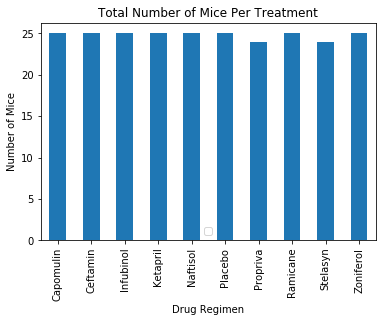

In [136]:
# Generate a bar plot showing the total number OF MICE for each treatment throughout 
# the course of the study using pandas. 
#do NOT make a bar chart for each regimen 

#x-axis
# bar_x_axis = np.arange(len(cleaned_mouse_data['Drug Regimen'].unique())) doesn't work need the values names
bar_locate = cleaned_mouse_data.loc[:, ['Mouse ID', 'Drug Regimen']] 
bar_locate

#use .nunique in the same way you found the summary table values above each mouse is unique so put ['Mouse ID'] at the end
bar_count = bar_locate.groupby(['Drug Regimen']).nunique()['Mouse ID'] 

# bar_x_values = bar_count.index
# bar_y_values = bar_count.values

#put into a new data frame
bar_pd_df = pd.DataFrame(bar_count) 

bar_pd_chart = bar_pd_df.plot.bar(rot=90, title='Total Number of Mice Per Treatment') 
bar_pd_chart.set_xlabel("Drug Regimen")
bar_pd_chart.set_ylabel("Number of Mice")
bar_pd_chart.legend([])   





Text(0.5, 0, 'Drug Regimen')

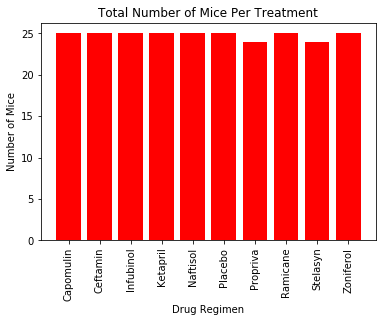

In [150]:
#make a bar chart of number of mice in each treatment using matplotlib

bar_plt_count = bar_count 

# took the x and y axis from above that were not used
bar_x_axis = bar_plt_count.index 
bar_y_axis = bar_plt_count.values
bar_x_ticks = [value for value in bar_x_axis] 
# plt.xticks(bar_x_ticks, bar_plt_count)  
#plot the bar graph
plt.bar(bar_x_axis, bar_y_axis, color='r')
plt.xticks(bar_x_ticks, list(bar_x_axis), rotation=90)

#labels
plt.title("Total Number of Mice Per Treatment")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen") 


Pie Charts

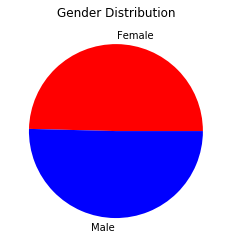

In [186]:
#generate pie plot showing distribution of male vs female mice in pandas
# gender_loc = cleaned_mouse_data.loc[:,['Mouse ID', 'Sex']]
gender_group = cleaned_mouse_data.groupby(['Sex']).nunique()  
gender_df = pd.DataFrame(gender_group)
gender_count = gender_df["Mouse ID"]

pie_sex = gender_count.index
pie_sex_number = gender_count.values

colors = ["red", "blue"]

gender_count.plot(kind='pie', colors=colors)      
plt.title("Gender Distribution")
plt.ylabel("")
plt.show() 

Text(0.5, 1.0, 'Gender Comparison')

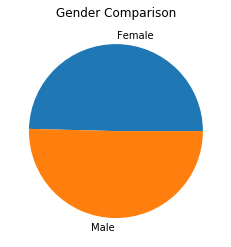

In [204]:
#pie plot using matplotlib

plt_count = cleaned_mouse_data.loc[:,['Mouse ID', 'Sex']]
plt_group = plt_count.groupby(['Sex']).nunique()['Mouse ID'] 

labels = plt_group.index
sizes = plt_group.values

plt.pie(sizes, labels=labels) 

plt.title("Gender Comparison") 


Quartiles, Outliers, and Boxplots

In [209]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_group = cleaned_mouse_data.groupby('Mouse ID').max()['Timepoint'] 
mouse_max_df = pd.DataFrame(mouse_group) 
mouse_max_df

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_mouse_data = mouse_max_df.merge(cleaned_mouse_data, on=["Mouse ID", "Timepoint"]) 
merge_mouse_data

Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0       a203         45           67.973419                 2    Infubinol   
1       a251         45           65.525743                 1    Infubinol   
2       a262         45           70.717621                 4      Placebo   
3       a275         45           62.999356                 3     Ceftamin   
4       a366         30           63.440686                 1     Stelasyn   
..       ...        ...                 ...               ...          ...   
243     z435         10           48.710661                 0     Propriva   
244     z578         45           30.638696                 0     Ramicane   
245     z581         45           62.754451                 3    Infubinol   
246     z795         45           65.741070                 3     Naftisol   
247     z969         45           73.867845                 4     Naftisol   

        Sex  Age_months  Weight (g)  
0    Female          20          23  
1    Female          21          25  
2    Female          17          29  
3    Female          20          28  
4    Female          16          29  
..      ...         ...         ...  
243  Female          12          26  
244    Male          11          16  
245  Female          24          25  
246  Female          13          29  
247    Male           9          30  

[248 rows x 8 columns]

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] 

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

capomulin = merge_mouse_data.loc[merge_mouse_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)'] 



# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#find quartiles
quartile_capo = capomulin.quantiles([0.25,0.5,0.75])
capo_lower = quartile_capo[0.25] 
capo_upper = quartile_capo[0.75] 
iqr_capo = capo_upper - capo_lower


    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    